In this notebook we illustrate the total mass invariance wich makes the model also adapted for different total masses. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import mlpgw

%matplotlib notebook

In [2]:
M1, M2 = 20, 50
q = 4
s1z, s2z = 0.5, 0.8
phi = 0
deltaT = 2**-14

In [3]:
# Compute waveforms with lalsim
h1 = mlpgw.CompactBinary(m1=M1*q/(q+1), m2=M1/(q+1), s1z=s1z, s2z=s2z).get_waveform(phi=phi, deltaT=deltaT)
h2 = mlpgw.CompactBinary(m1=M2*q/(q+1), m2=M2/(q+1), s1z=s1z, s2z=s2z).get_waveform(phi=phi, deltaT=deltaT)

In [4]:
# Dowload the model
model = mlpgw.load_obj('../data/model')

# Compute waveforms with mlpgw
h1_pred = model.predict(m1=M1*q/(q+1), m2=M1/(q+1), s1z=s1z, s2z=s2z, phi=phi, deltaT=deltaT)
h2_pred = model.predict(m1=M2*q/(q+1), m2=M2/(q+1), s1z=s1z, s2z=s2z, phi=phi, deltaT=deltaT)

In [5]:
# Resample to get same time grid
resampler = mlpgw.Transformer(name='resample', new_time=h1_pred['time'])
h1 = resampler.transform(**h1)
resampler = mlpgw.Transformer(name='resample', new_time=h2_pred['time'])
h2 = resampler.transform(**h2)

# Crop time axis
#indices = (h1['time']>=h1_pred['time'][0]) * (h1['time']<=h1_pred['time'][-1])
#h1['hp'] = h1['hp'][indices]
#h1['hc'] = h1['hc'][indices]
#h1['time'] = h1['time'][indices]
#indices = (h2['time']>=h2_pred['time'][0]) * (h2['time']<=h2_pred['time'][-1])
#h2['hp'] = h2['hp'][indices]
#h2['hc'] = h2['hc'][indices]
#h2['time'] = h2['time'][indices] 

# Post precessing by hand
h1_modif= {}
h1_modif['hp'] = h1['hp']*M2/M1
h1_modif['hc'] = h1['hc']*M2/M1
h1_modif['time'] = h1['time']*M2/M1

In [6]:
# h2 and h1_modif does not have the same deltaT so we need to resample h1_modif
# As we used a resampler the mismatch will be lower than the others for wich the time grid does not strictly correspond
resampler = mlpgw.Transformer(name='resample', new_time=h2['time'])
print("Mismatch metric (h2, h1_modif): {}".format(1-mlpgw._match_metric(h2, resampler.transform(**copy.deepcopy(h1_modif)))))
print("Mismatch metric (h1, h1_pred): {}".format(1-mlpgw._match_metric(h1, h1_pred)))
print("Mismatch metric (h2, h2_pred): {}".format(1-mlpgw._match_metric(h2, h2_pred)))

Mismatch metric (h2, h1_modif): 6.956229542387504e-07
Mismatch metric (h1, h1_pred): 4.8120828938236215e-06
Mismatch metric (h2, h2_pred): 4.737288844647303e-06


<IPython.core.display.Javascript object>


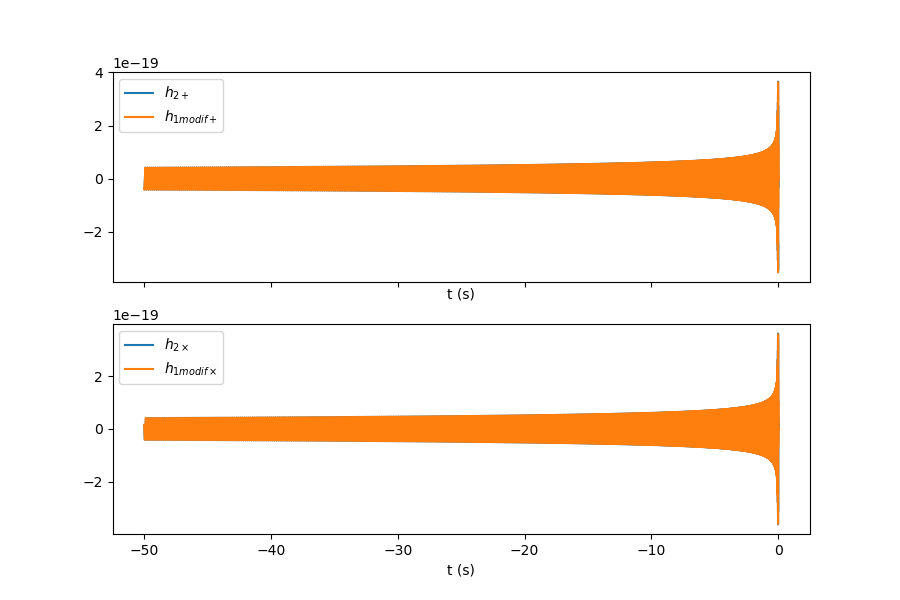

<IPython.core.display.Javascript object>


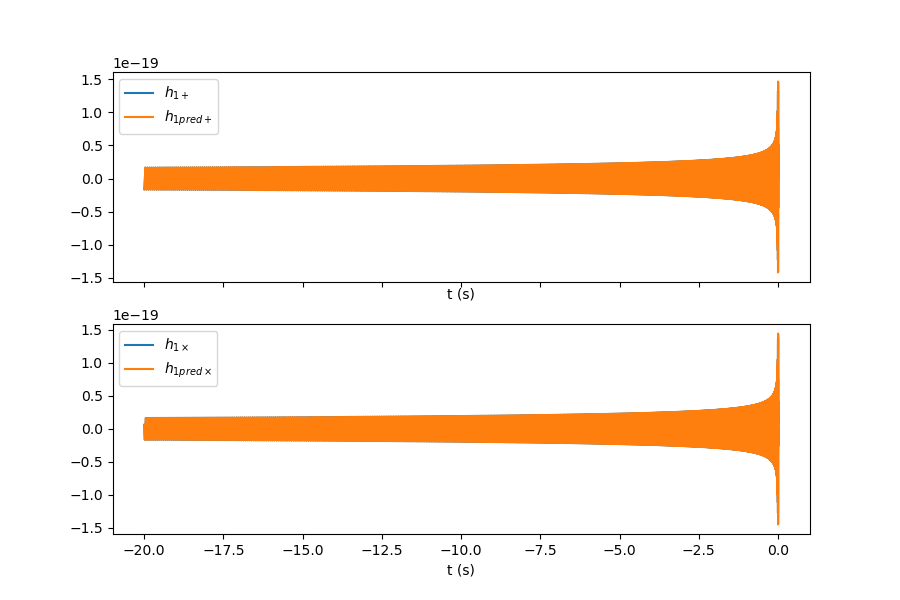

<IPython.core.display.Javascript object>

In [7]:
fig, axes = plt.subplots(2, figsize=(9, 3*2), sharex=True)
axes[0].plot(h2['time'], h2['hp'], label=r'$h_{2+}$')
axes[0].plot(h1_modif['time'], h1_modif['hp'], label=r'$h_{1modif+}$')
axes[1].plot(h2['time'], h2['hc'], label=r'$h_{2\times}$')
axes[1].plot(h1_modif['time'], h1_modif['hc'], label=r'$h_{1modif\times}$')
for ax in axes:
    ax.set_xlabel('t (s)')
    ax.legend()
plt.show()

fig, axes = plt.subplots(2, figsize=(9, 3*2), sharex=True)
axes[0].plot(h1['time'], h1['hp'], label=r'$h_{1+}$')
axes[0].plot(h1_pred['time'], h1_pred['hp'], label=r'$h_{1pred+}$')
axes[1].plot(h1['time'], h1['hc'], label=r'$h_{1\times}$')
axes[1].plot(h1_pred['time'], h1_pred['hc'], label=r'$h_{1pred\times}$')
for ax in axes:
    ax.set_xlabel('t (s)')
    ax.legend()
plt.show()

fig, axes = plt.subplots(2, figsize=(9, 3*2), sharex=True)
axes[0].plot(h2['time'], h2['hp'], label=r'$h_{2+}$')
axes[0].plot(h2_pred['time'], h2_pred['hp'], label=r'$h_{2pred+}$')
axes[1].plot(h2['time'], h2['hc'], label=r'$h_{2\times}$')
axes[1].plot(h2_pred['time'], h2_pred['hc'], label=r'$h_{2pred\times}$')
for ax in axes:
    ax.set_xlabel('t (s)')
    ax.legend()
plt.show()